# Boosting
## Alto bias - Underfitting
- Se entrenan los modelos de manera secuencial, no paralelo como Bagging
- Bootstraping con modelos de alto Bias y baja Varianza
- Se distinguen las predicciones dificiles y se pesan para que el siguiente predictor focalice en ellas
- Al final cada modelo se pesa de manera diferente

In [1048]:
%load_ext autoreload
%autoreload 2
import reg_helper as RHelper
import numpy as np
from functools import partial
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1049]:
folder = 'data/'
X_train = np.load(folder+'X_train.npy')
X_test = np.load(folder+'X_test.npy')
y_train = np.load(folder+'y_train.npy') 
y_test = np.load(folder+'y_test.npy')

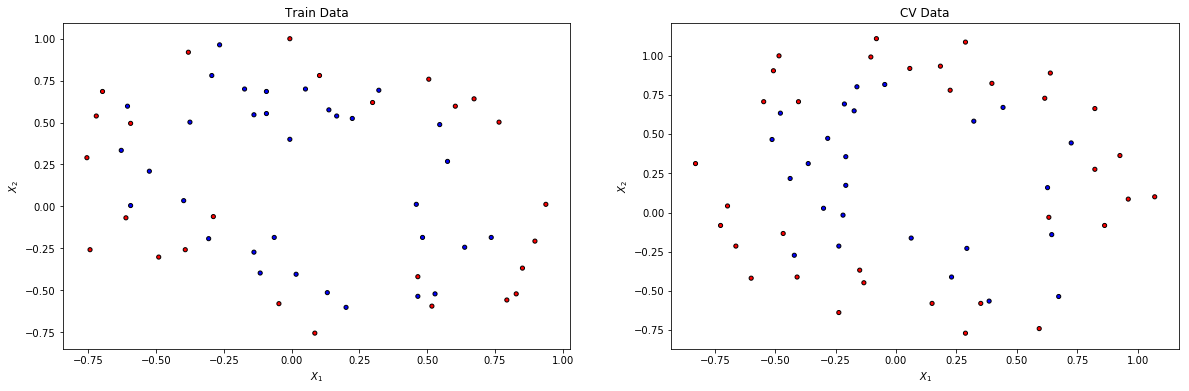

In [1050]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

# AdaBoostClassifier
https://www.youtube.com/watch?v=LsK-xG1cLYA
- Se suelen usar stumps (Forest of stumps) - week learners
- La diferencia con Random forests es el peso con el que se suman y que es secuencial (Ya que se pesan por el error)
- Stump: Un nodo y dos hojas
- Se pesan los errores para que en el bootstrapping tengan mas probabilidad de salir
- El peso del predictor al final es 'proporcional' a la mejora

https://xavierbourretsicotte.github.io/AdaBoost.html

In [1051]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [1081]:
n_estimators = 500
alg = 'SAMME.R'
lr = 1.0

In [1082]:

base_clf = DecisionTreeClassifier(max_depth=1, criterion='entropy')

boost_clf = AdaBoostClassifier(base_clf, n_estimators=n_estimators, algorithm=alg, 
                               random_state=42, learning_rate=lr)

In [1083]:
boost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

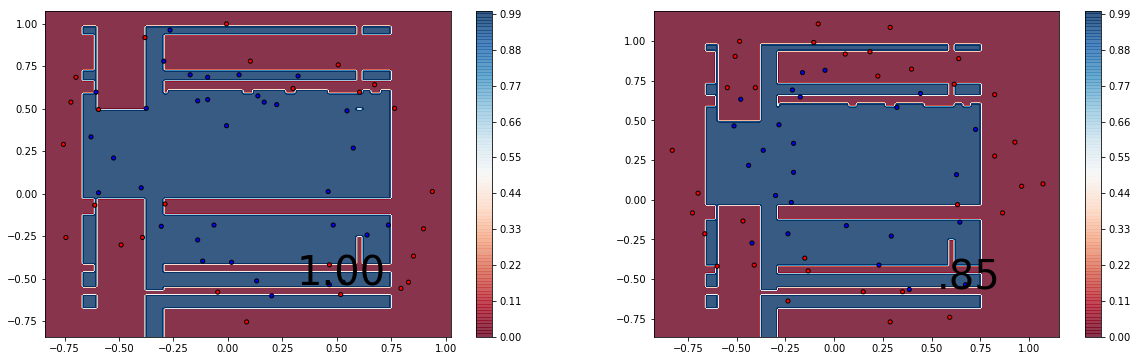

In [1084]:
score_train = boost_clf.score(X_train, y_train)
score_test = boost_clf.score(X_test, y_test)
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, boost_clf.predict,  mesh_res=200, ax=ax1, bound_line=False)
RHelper.plot_boundaries(X_test, y_test, score_test, boost_clf.predict,  mesh_res=200, ax=ax2, bound_line=False)

In [1093]:
lr=0.01
n_estimators=2000
base_clf = DecisionTreeClassifier(max_depth=1, criterion='entropy')

boost_clf = AdaBoostClassifier(base_clf, n_estimators=n_estimators, algorithm=alg, 
                               random_state=42, learning_rate=lr)
boost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

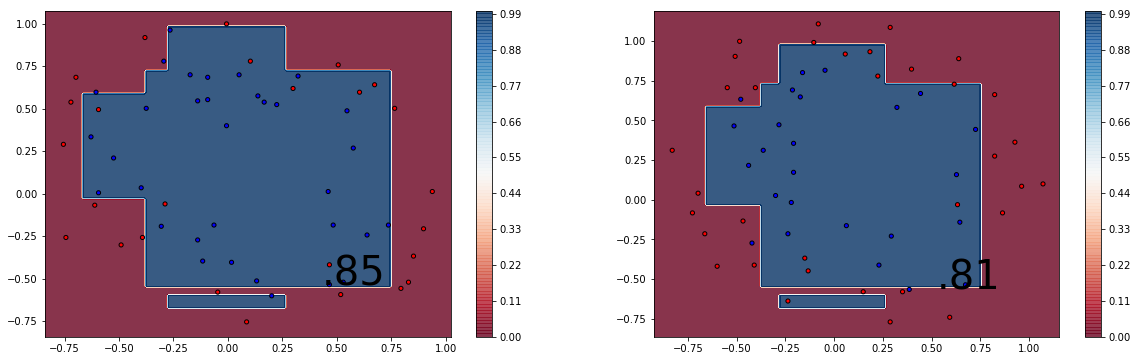

In [1094]:
score_train = boost_clf.score(X_train, y_train)
score_test = boost_clf.score(X_test, y_test)
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, boost_clf.predict,  mesh_res=200, ax=ax1, bound_line=False)
RHelper.plot_boundaries(X_test, y_test, score_test, boost_clf.predict,  mesh_res=200, ax=ax2, bound_line=False)

# GradientBoostingClassifier

https://www.youtube.com/watch?v=3CC4N4z3GJc

- El primero suele ser un stump, pero luego suelen ser mas grandes que un stump
- Se agrega learning rate para evitar el overfitting (Cuando se hace la suma para hacer la predicción se multiplica por este que esta entre 0 y 1)
- Cada arbol nuevo busca estimar el error de las estimaciones con la suma de todos los arboles anteriores (secuencial) (Multiplicados por el learning rate)

In [1095]:
n_estimators = 100
learning_rate = 0.1 # 1.0, 0.001
GBC_clf = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=2, random_state=1, learning_rate=learning_rate)
GBC_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

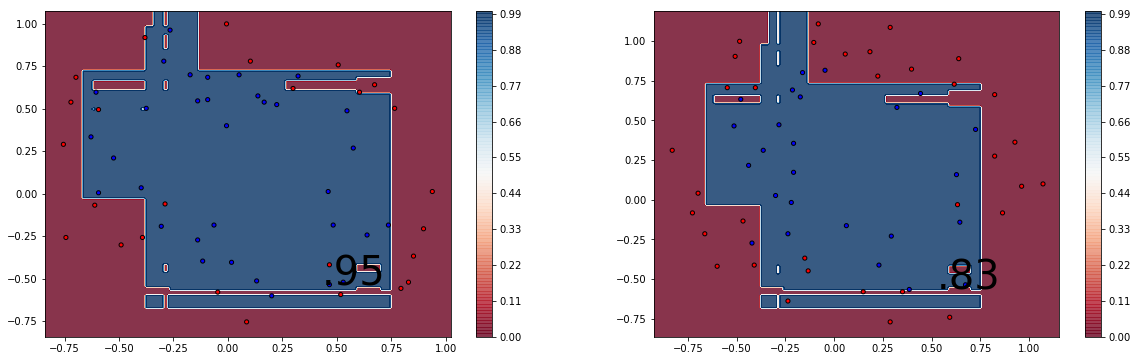

In [1096]:
score_train = GBC_clf.score(X_train, y_train)
score_test = GBC_clf.score(X_test, y_test)
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, GBC_clf.predict,  mesh_res=200, ax=ax1, bound_line=False)
RHelper.plot_boundaries(X_test, y_test, score_test, GBC_clf.predict,  mesh_res=200, ax=ax2, bound_line=False)

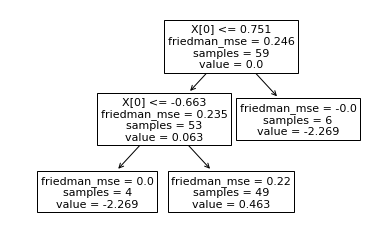

In [1097]:
_=plot_tree(GBC_clf.estimators_[0][0])

# XGBoost

In [1098]:
from xgboost.sklearn import XGBClassifier

In [1126]:
xgb_clf = XGBClassifier(max_depth=100,
    learning_rate=1.0,
    n_estimators=10,
    gamma=0)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

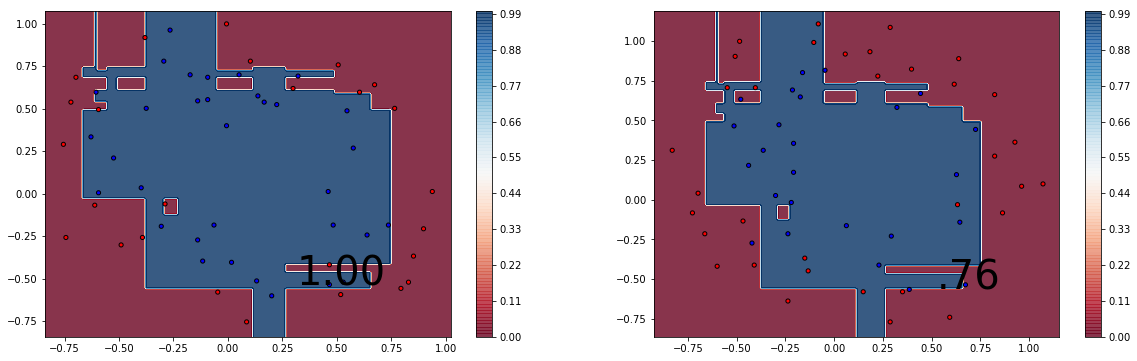

In [1127]:
score_train = xgb_clf.score(X_train, y_train)
score_test = xgb_clf.score(X_test, y_test)
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, xgb_clf.predict,  mesh_res=200, ax=ax1, bound_line=False)
RHelper.plot_boundaries(X_test, y_test, score_test, xgb_clf.predict,  mesh_res=200, ax=ax2, bound_line=False)

# LightGBM

In [1135]:
from lightgbm.sklearn import LGBMClassifier

In [1172]:
lgbm_clf = LGBMClassifier(max_depth=1, learning_rate=1.0, n_estimators=1000, min_child_samples=1)

In [1173]:
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=1.0, max_depth=1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

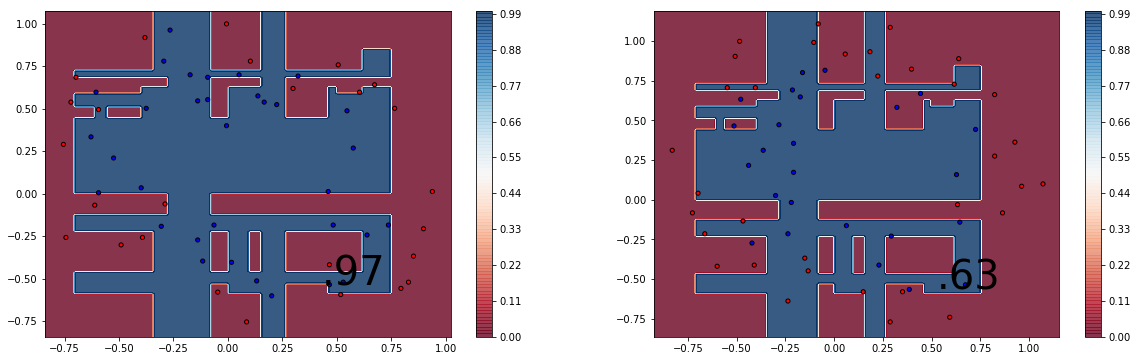

In [1171]:
score_train = lgbm_clf.score(X_train, y_train)
score_test = lgbm_clf.score(X_test, y_test)
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, score_train, lgbm_clf.predict,  mesh_res=200, ax=ax1, bound_line=False)
RHelper.plot_boundaries(X_test, y_test, score_test, lgbm_clf.predict,  mesh_res=200, ax=ax2, bound_line=False)

In [1150]:
lgbm_clf.feature_importances_

NotFittedError: No feature_importances found. Need to call fit beforehand.